In [74]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [75]:
house_df = pd.read_csv('HousePricePrediction.xlsx - Sheet1.csv')

In [76]:
house_df.shape

(2919, 13)

In [77]:
house_df.head(3)

Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0

In [78]:
house_df.drop_duplicates(inplace=True)

In [79]:
house_df.shape

(2919, 13)

In [80]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [81]:
house_df.drop(columns = ['Id'], inplace = True)

In [82]:
house_df.head(3)

MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0          60       RL     8450    Inside     1Fam            5       2003   
1          20       RL     9600       FR2     1Fam            8       1976   
2          60       RL    11250    Inside     1Fam            5       2001   

   YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0          2003     VinylSd         0.0        856.0   208500.0  
1          1976     MetalSd         0.0       1262.0   181500.0  
2          2002     VinylSd         0.0        920.0   223500.0

In [83]:
house_df.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [84]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(house_df[['SalePrice']])

SimpleImputer()

In [85]:
imputer.statistics_

array([180921.19589041])

In [86]:
house_df['SalePrice'] = imputer.transform(house_df[['SalePrice']])

In [87]:
house_df.isna().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [88]:
house_df = house_df.fillna(0)

In [89]:
house_df.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [90]:
house_df.describe()

MSSubClass        LotArea  OverallCond    YearBuilt  YearRemodAdd  \
count  2919.000000    2919.000000  2919.000000  2919.000000   2919.000000   
mean     57.137718   10168.114080     5.564577  1971.312778   1984.264474   
std      42.517628    7886.996359     1.113131    30.291442     20.894344   
min      20.000000    1300.000000     1.000000  1872.000000   1950.000000   
25%      20.000000    7478.000000     5.000000  1953.500000   1965.000000   
50%      50.000000    9453.000000     5.000000  1973.000000   1993.000000   
75%      70.000000   11570.000000     6.000000  2001.000000   2004.000000   
max     190.000000  215245.000000     9.000000  2010.000000   2010.000000   

        BsmtFinSF2  TotalBsmtSF      SalePrice  
count  2919.000000  2919.000000    2919.000000  
mean     49.565262  1051.417266  180921.195890  
std     169.179104   441.120498   56174.332503  
min       0.000000     0.000000   34900.000000  
25%       0.000000   793.000000  163000.000000  
50%       0.000000   989.000000  180921.195890  
75%       0.000000  1302.000000  180921.195890  
max    1526.000000  6110.000000  755000.000000

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
sns.set_style('darkgrid')

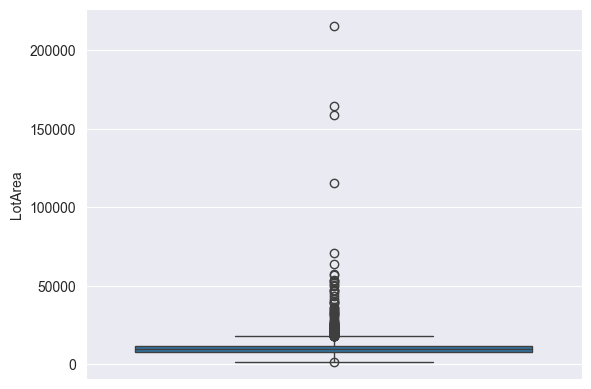

In [93]:
sns.boxplot(house_df, y = 'LotArea');

In [94]:
import numpy as np#quartile

Q1 = np.percentile(house_df['LotArea'], 25, interpolation = 'midpoint') #interquartile
Q3 = np.percentile(house_df['LotArea'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

In [95]:
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

In [96]:
df = house_df[(house_df.LotArea < upperBound) & (house_df.LotArea > lowerBound)]

In [97]:
df

MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2913         160       RM     1526    Inside    Twnhs            5       1970   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF     SalePrice  
0             2003     VinylSd         0.0        856.0  208500.00000  
1             1976     MetalSd         0.0       1262.0  181500.00000  
2             2002     VinylSd         0.0        920.0  223500.00000  
3             1970     Wd Sdng         0.0        756.0  140000.00000  
4             2000     VinylSd         0.0       1145.0  250000.00000  
...            ...         ...         ...          ...           ...  
2913          1970     CemntBd         0.0        546.0  180921.19589  
2914          1970     CemntBd         0.0        546.0  180921.19589  
2915          1970     CemntBd         0.0        546.0  180921.19589  
2917          1992     HdBoard         0.0        912.0  180921.19589  
2918          1994     HdBoard         0.0        996.0  180921.19589  

[2791 rows x 12 columns]

In [98]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', 0], dtype=object)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2791 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2791 non-null   int64  
 1   MSZoning      2791 non-null   object 
 2   LotArea       2791 non-null   int64  
 3   LotConfig     2791 non-null   object 
 4   BldgType      2791 non-null   object 
 5   OverallCond   2791 non-null   int64  
 6   YearBuilt     2791 non-null   int64  
 7   YearRemodAdd  2791 non-null   int64  
 8   Exterior1st   2791 non-null   object 
 9   BsmtFinSF2    2791 non-null   float64
 10  TotalBsmtSF   2791 non-null   float64
 11  SalePrice     2791 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 283.5+ KB


In [100]:
cat_cols = df.select_dtypes('object').columns.tolist()

In [101]:
cat_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [102]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

df.loc[:, cat_cols] = df[cat_cols].astype(str)

encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [103]:
encoded_data = encoder.transform(df[cat_cols])

In [104]:
encoded_df = encoder.get_feature_names_out(cat_cols)

In [105]:
encoded_df

array(['MSZoning_0', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'], dtype=object)

In [107]:
df

MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2913         160       RM     1526    Inside    Twnhs            5       1970   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF     SalePrice  
0             2003     VinylSd         0.0        856.0  208500.00000  
1             1976     MetalSd         0.0       1262.0  181500.00000  
2             2002     VinylSd         0.0        920.0  223500.00000  
3             1970     Wd Sdng         0.0        756.0  140000.00000  
4             2000     VinylSd         0.0       1145.0  250000.00000  
...            ...         ...         ...          ...           ...  
2913          1970     CemntBd         0.0        546.0  180921.19589  
2914          1970     CemntBd         0.0        546.0  180921.19589  
2915          1970     CemntBd         0.0        546.0  180921.19589  
2917          1992     HdBoard         0.0        912.0  180921.19589  
2918          1994     HdBoard         0.0        996.0  180921.19589  

[2791 rows x 12 columns]

In [108]:
df.drop(columns=cat_cols, inplace=True)

In [109]:
df

MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0             60     8450            5       2003          2003         0.0   
1             20     9600            8       1976          1976         0.0   
2             60    11250            5       2001          2002         0.0   
3             70     9550            5       1915          1970         0.0   
4             60    14260            5       2000          2000         0.0   
...          ...      ...          ...        ...           ...         ...   
2913         160     1526            5       1970          1970         0.0   
2914         160     1936            7       1970          1970         0.0   
2915         160     1894            5       1970          1970         0.0   
2917          85    10441            5       1992          1992         0.0   
2918          60     9627            5       1993          1994         0.0   

      TotalBsmtSF     SalePrice  
0           856.0  208500.00000  
1          1262.0  181500.00000  
2           920.0  223500.00000  
3           756.0  140000.00000  
4          1145.0  250000.00000  
...           ...           ...  
2913        546.0  180921.19589  
2914        546.0  180921.19589  
2915        546.0  180921.19589  
2917        912.0  180921.19589  
2918        996.0  180921.19589  

[2791 rows x 8 columns]

In [110]:
df.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [111]:
X = df.drop(columns = 'SalePrice')
y = df['SalePrice']

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)

MinMaxScaler()

In [113]:
X[:] = scaler.transform(X)

In [114]:
X

MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0       0.235294  0.430838        0.500   0.949275      0.883333         0.0   
1       0.000000  0.501821        0.875   0.753623      0.433333         0.0   
2       0.235294  0.603666        0.500   0.934783      0.866667         0.0   
3       0.294118  0.498735        0.500   0.311594      0.333333         0.0   
4       0.235294  0.789457        0.500   0.927536      0.833333         0.0   
...          ...       ...          ...        ...           ...         ...   
2913    0.823529  0.003457        0.500   0.710145      0.333333         0.0   
2914    0.823529  0.028764        0.750   0.710145      0.333333         0.0   
2915    0.823529  0.026171        0.500   0.710145      0.333333         0.0   
2917    0.382353  0.553731        0.500   0.869565      0.700000         0.0   
2918    0.235294  0.503487        0.500   0.876812      0.733333         0.0   

      TotalBsmtSF  
0        0.266999  
1        0.393637  
2        0.286962  
3        0.235808  
4        0.357143  
...           ...  
2913     0.170306  
2914     0.170306  
2915     0.170306  
2917     0.284467  
2918     0.310667  

[2791 rows x 7 columns]

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2232, 7), (559, 7), (2232,), (559,))

In [117]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)

In [119]:
y_test[:5]

2888    180921.19589
2364    180921.19589
2075    180921.19589
2564    180921.19589
2216    180921.19589
Name: SalePrice, dtype: float64

In [120]:
y_pred[:5]

array([120276.56367889, 200132.70846542, 147044.10393491, 128809.64106338,
       134581.92906544])

In [121]:
from sklearn.metrics import mean_absolute_error

In [122]:
mean_absolute_error(y_test, y_pred)

30778.945498149955

In [123]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=50, max_iter=100, tol = 0.1)

lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [124]:
lasso_pred = lasso_reg.predict(X_test)

In [125]:
mean_absolute_error(y_test, lasso_pred)

30708.65196714615

In [126]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=50, max_iter=100, tol = 0.1)

ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [127]:
ridge_pred = ridge_reg.predict(X_test)

In [128]:
mean_absolute_error(y_test, ridge_pred)

30005.57240499122